In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

pyo.init_notebook_mode()
sns.set_style('darkgrid')

plt.rc('figure' , figsize = (20,10))

Output hidden; open in https://colab.research.google.com to view.

In [5]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# 새 섹션

In [6]:
# 끝 2개의 컬럼 제거

df = df[df.columns[:-2]]
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
# 'Attrition_Flag' 컬럼 값 변경 (1 : 이탈고객, 0 : 유지고객)

df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Attrited Customer' : 1, 'Existing Customer': 0})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
df.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
df['Months_on_book'].sort_values()

1683    13
3757    13
9897    13
6383    13
6756    13
        ..
1330    56
1625    56
208     56
3924    56
2169    56
Name: Months_on_book, Length: 10127, dtype: int64

## EDA

In [13]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

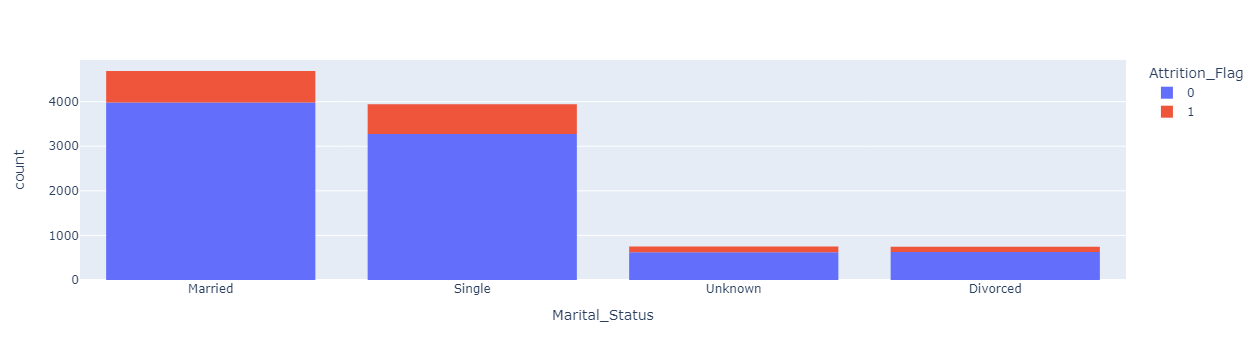

In [32]:
# 결혼 여부에 따른 이탈 여부를 시각화

fig = ex.histogram(df, x="Marital_Status", color="Attrition_Flag", nbins=10)
fig.show()

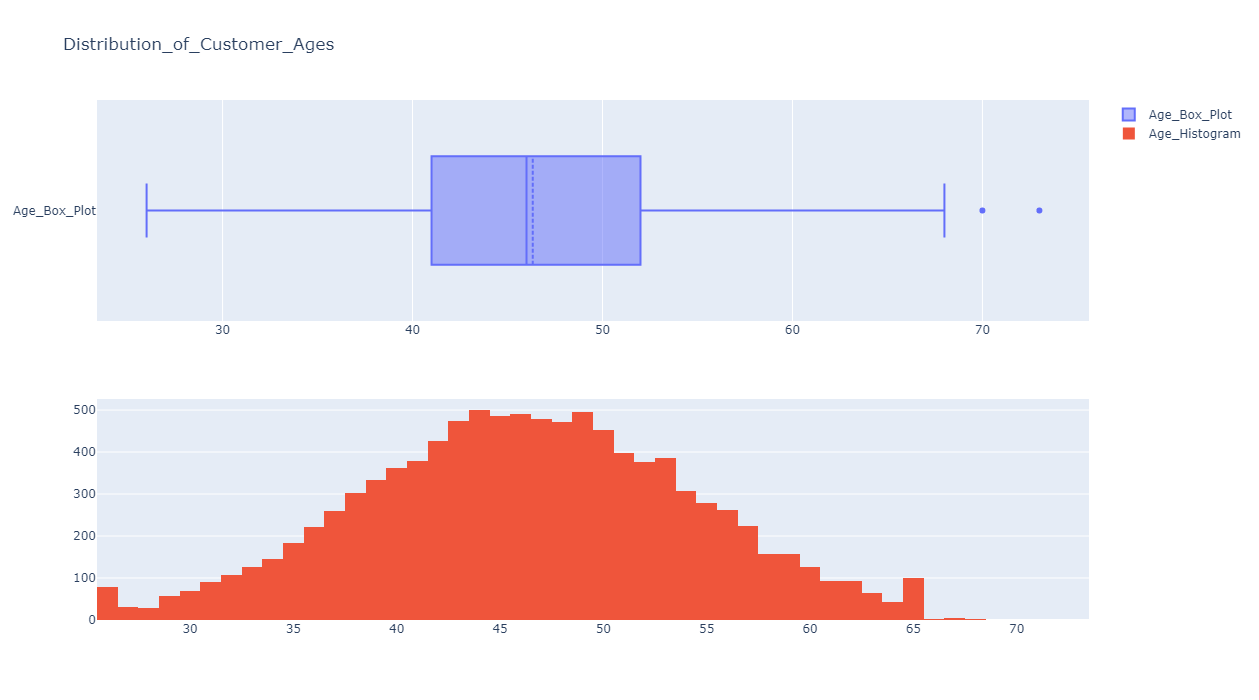

In [33]:
# 고객의 연령 분포 시각화

fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(x=df['Customer_Age'], name = 'Age_Box_Plot', boxmean=True)
tr2 = go.Histogram(x=df['Customer_Age'], name = 'Age_Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 700, width = 1200, title_text = 'Distribution_of_Customer_Ages')
fig.show()

In [16]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

고객의 연령이 정규 분포를 따름. 이후 연령 특성을 사용할 때 정규분포 가정을 전제로 할 수 있음.

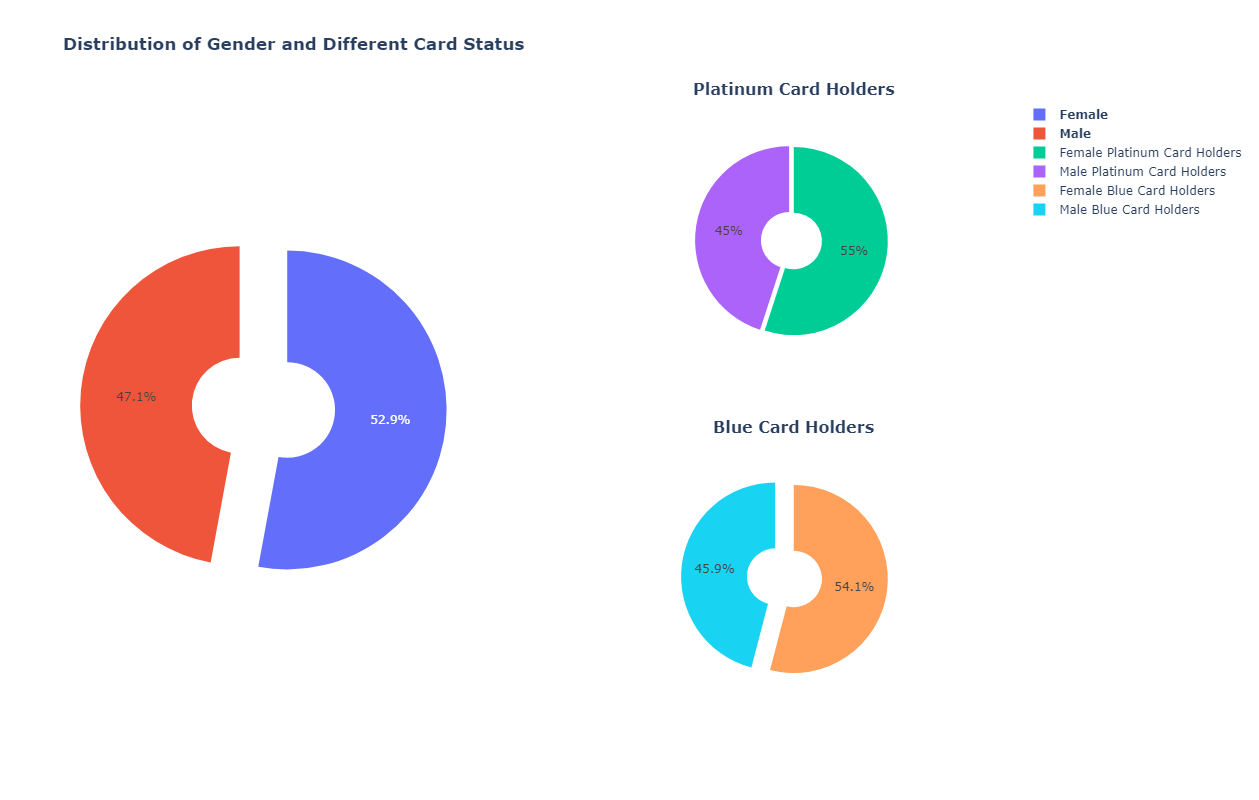

In [17]:
# 성별에 따른 카드 종류 중 blue, platinum

fig = make_subplots(rows = 2, cols = 2, subplot_titles = ('', '<b>Platinum Card Holders' , '<b>Blue Card Holders<b>' , 'Residulas'),
                   vertical_spacing = 0.09,
                   specs = [[{'type' : 'pie', 'rowspan' : 2}, {'type' : 'pie'}],
                           [None , {'type' : 'pie'}]])

fig.add_trace(go.Pie(values = df.Gender.value_counts().values, labels = ['<b>Female<b>' , '<b>Male<b>'], hole = 0.3, pull = [0, 0.3]), row = 1, col = 1)

fig.add_trace(go.Pie(
        labels = ['Female Platinum Card Holders'  , 'Male Platinum Card Holders'],
        values = df.query('Card_Category == "Platinum"').Gender.value_counts().values , 
        pull = [0, 0.05 , 0.5],
        hole = 0.3
    ),
    row = 1 , col = 2
)

fig.add_trace(
    go.Pie(
        labels = ['Female Blue Card Holders'  , 'Male Blue Card Holders'],
        values = df.query('Card_Category == "Blue"').Gender.value_counts().values , 
        pull = [0, 0.2 , 0.5],
        hole = 0.3
    ),
    row = 2 , col = 2
)

fig.update_layout(
height = 800 , showlegend = True,
title_text = '<b>Distribution of Gender and Different Card Status<b>',)

fig.show()

그래프에서 여성이 남성보다 신용카드 비율이 약간 높은 것을 볼 수 있지만, 이 차이는 크지 않기 때문에 비슷한 비율로 볼 수 있다.

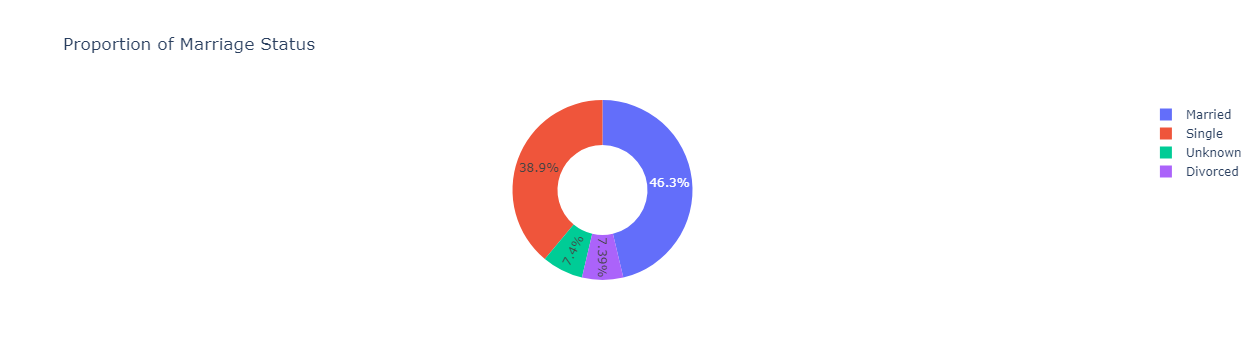

In [18]:
# 혼인 상태

ex.pie(df, names = 'Marital_Status', title = 'Proportion of Marriage Status', hole = 0.5)

결혼한 사람의 비율이 46.3%, 싱글이 38.9% 

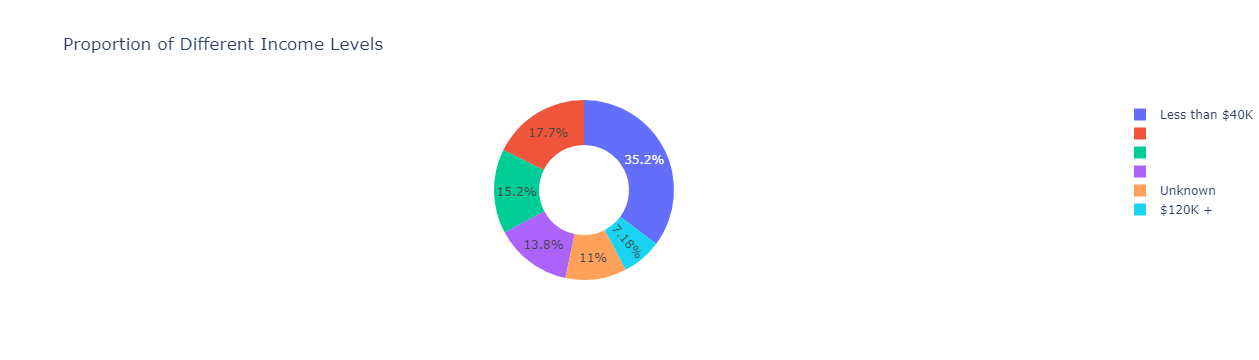

In [19]:
ex.pie(df, names = 'Income_Category', title = 'Proportion of Different Income Levels', hole = 0.5)

고객들의 수입 $40K가 35.2%를 차지하고 있다. 가장 높은 120K 이상은 7.18%

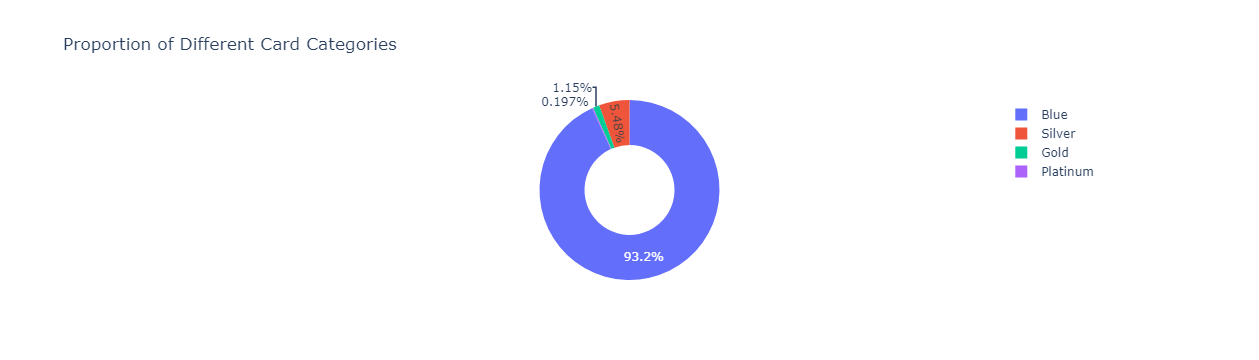

In [20]:
ex.pie(df, names='Card_Category', title = 'Proportion of Different Card Categories', hole = 0.5)

Blue카드 소지자가 가장 많은 것을 알 수 있다.

<Axes: xlabel='Card_Category'>

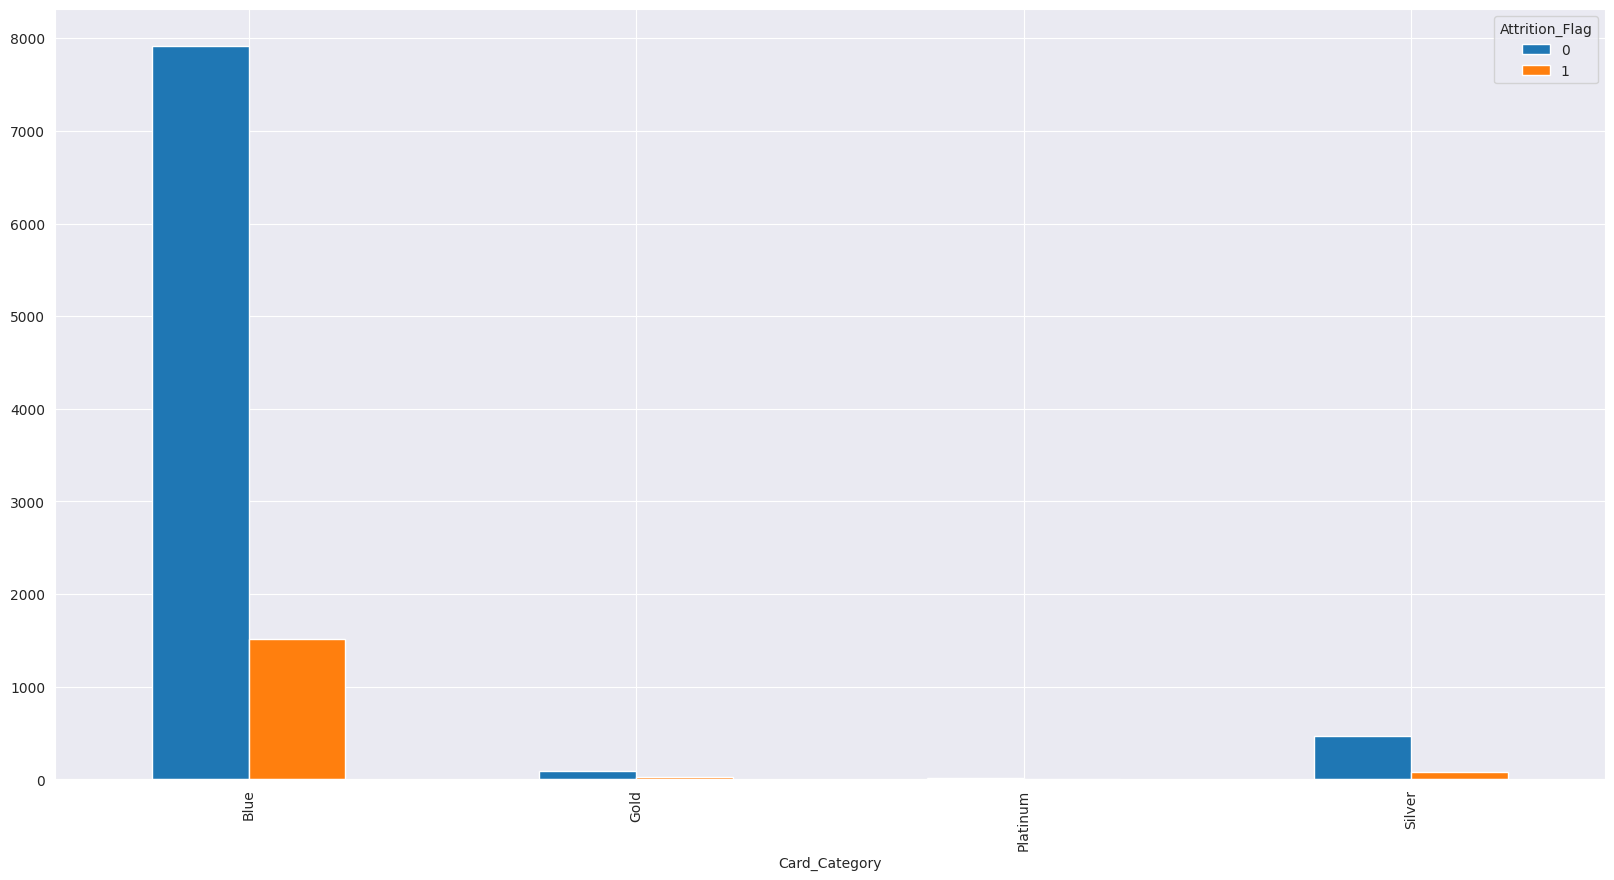

In [21]:
# 카드 종류에 따른 'Attrition_Flag' count

df.groupby(['Card_Category', 'Attrition_Flag']).size().unstack().plot(kind = 'bar')

In [22]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

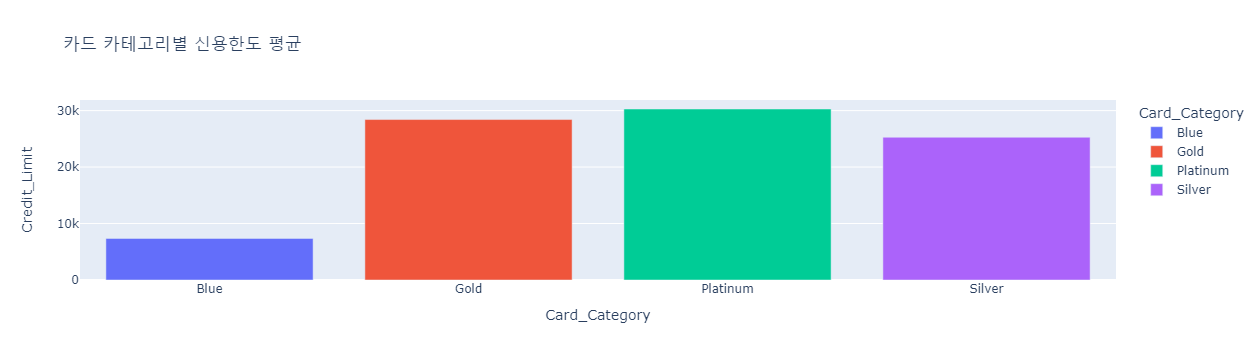

In [23]:
# 카드 카테고리를 groupby하고 그에 따른 Credit_Limit(신용한도)의 평균을 확인

grouped = df.groupby('Card_Category')['Credit_Limit'].mean().reset_index()

fig = ex.bar(grouped, x='Card_Category', y='Credit_Limit', color='Card_Category', title='카드 카테고리별 신용한도 평균')
fig.show()

<Axes: xlabel='Attrition_Flag', ylabel='count'>

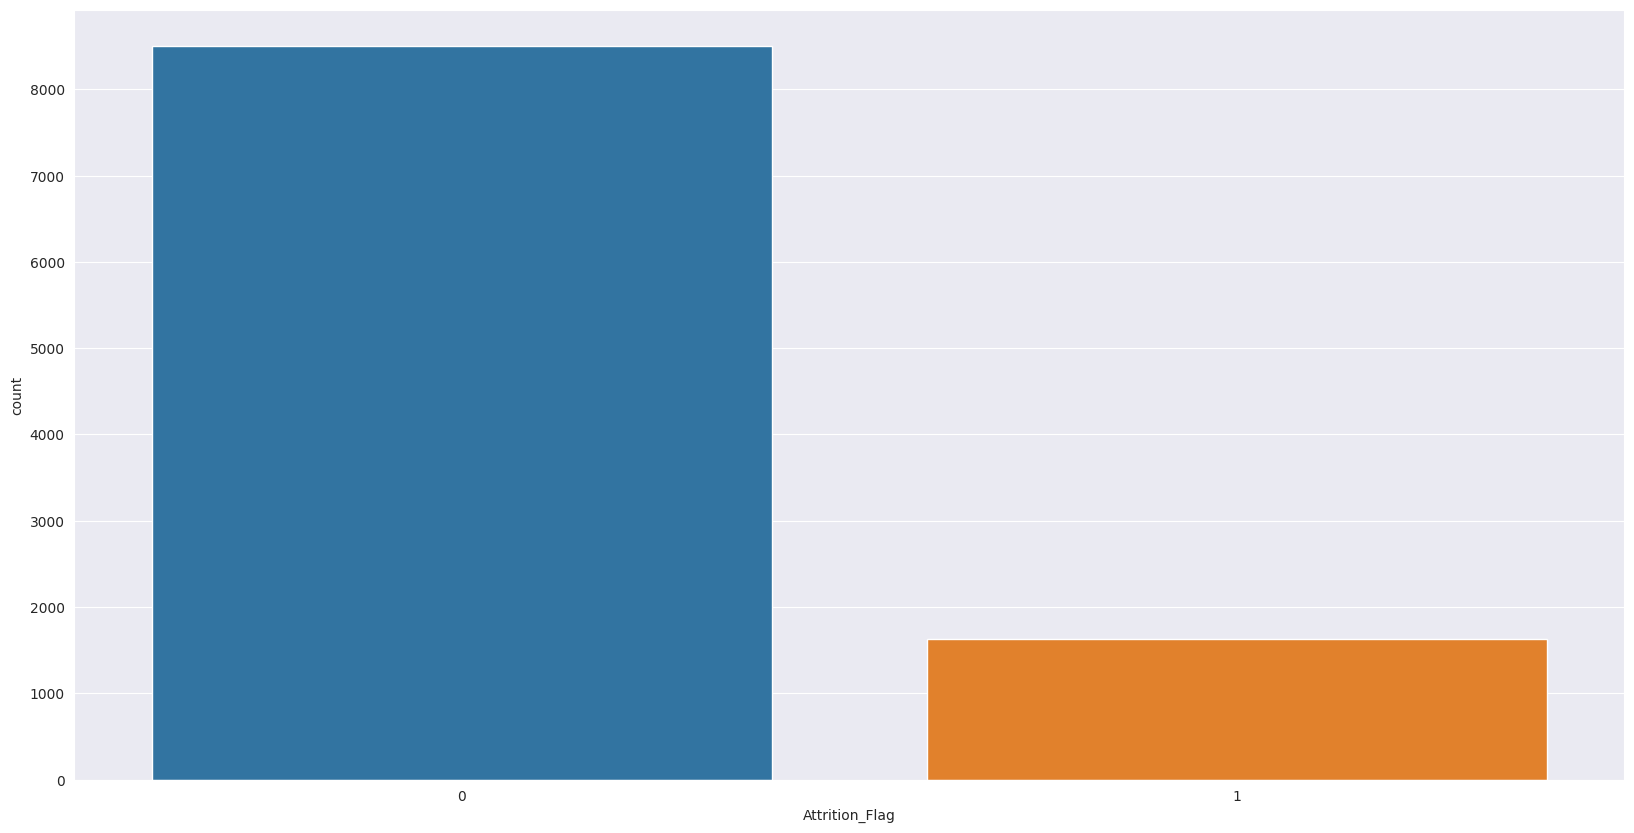

In [24]:
# Attrition_Flag 분포 확인

sns.countplot(x='Attrition_Flag', data=df)

In [25]:
import plotly.express as px

# 'Attrition_Flag'의 0과 1의 그룹 데이터를 추출
df_0 = df[df['Attrition_Flag'] == 0]
df_1 = df[df['Attrition_Flag'] == 1]

# 그룹 별로 변수들의 분포를 비교하는 그래프 생성
for col in df.columns[2:-1]:
    fig = px.histogram(df, x=col, color='Attrition_Flag', nbins=20)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# 'Age' 변수에서 30대에서 50대만 추출
df_30s_50s = df[(df['Customer_Age'] >= 30) & (df['Customer_Age'] < 60)]

# 그룹 별로 변수들의 분포를 비교하는 그래프 생성
for col in df.columns[2:-1]:
    fig = ex.histogram(df_30s_50s, x=col, color='Attrition_Flag', nbins=20)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [27]:
df.groupby('Attrition_Flag')[['Credit_Limit']].mean()

,Credit_Limit
Attrition_Flag,
0,8726.877518
1,8136.039459


In [28]:
df.groupby('Attrition_Flag')[['Months_Inactive_12_mon']].mean()

,Months_Inactive_12_mon
Attrition_Flag,
0,2.273765
1,2.693301


In [29]:
df.groupby('Attrition_Flag')[['Contacts_Count_12_mon']].mean()

,Contacts_Count_12_mon
Attrition_Flag,
0,2.356353
1,2.972342


In [30]:
# 

df.groupby('Attrition_Flag')[['Total_Trans_Ct']].mean()

,Total_Trans_Ct
Attrition_Flag,
0,68.672588
1,44.933620


<ipython-input-31-084e52b93082>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

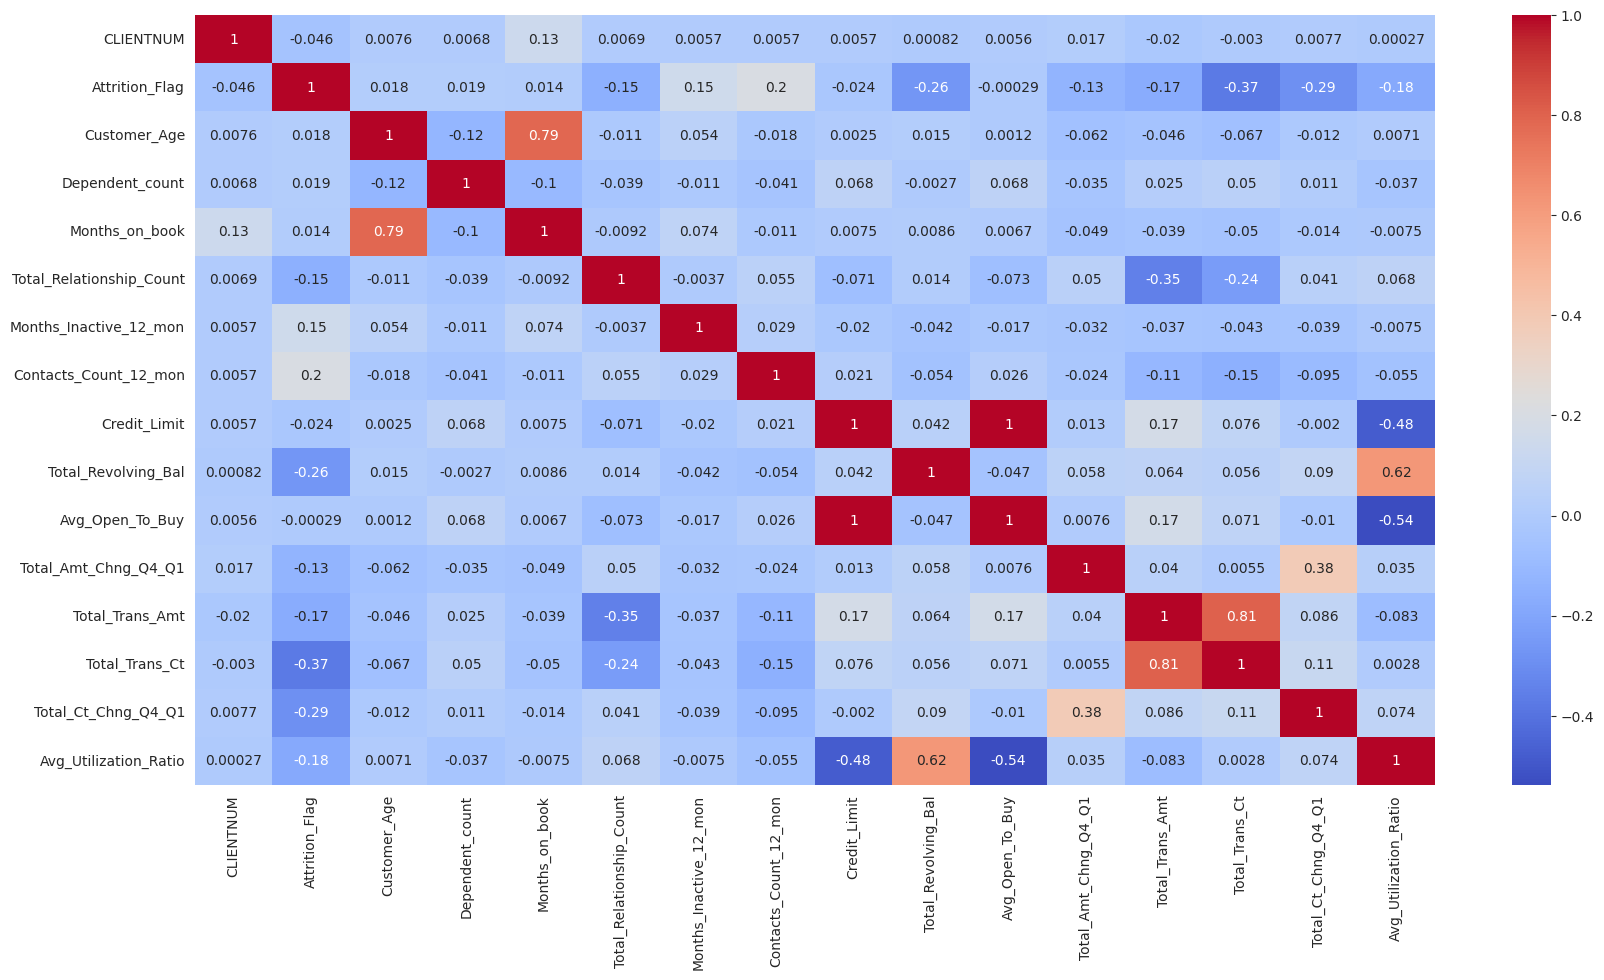

In [31]:
# 변수들 상관관계 분석

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)